In [1]:
import numpy as np # linear algebra
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn import metrics

import logging,sys


In [2]:
df = pd.read_csv("binary.csv")



In [3]:
df["rank"].describe()

count    400.00000
mean       2.48500
std        0.94446
min        1.00000
25%        2.00000
50%        2.00000
75%        3.00000
max        4.00000
Name: rank, dtype: float64

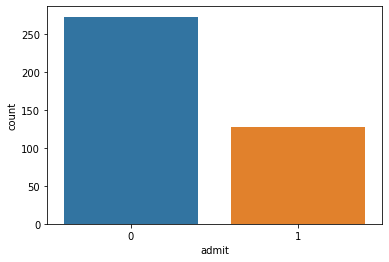

In [4]:
import seaborn as sns
sns.countplot(x="admit",data=df)

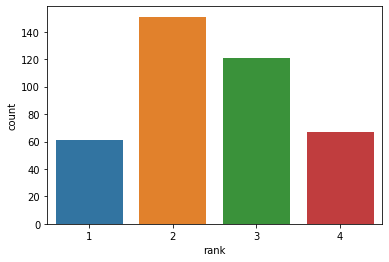

In [5]:
sns.countplot(x="rank",data=df)

In [6]:
df["rank"].value_counts()

2    151
3    121
4     67
1     61
Name: rank, dtype: int64

In [7]:
df["rank"].unique()

array([3, 1, 4, 2])

In [15]:

#Splitting independent data and targeted data as test and train
X_train, X_test, Y_train, Y_test= train_test_split(df[["gpa","gre","rank"]],
                                                   df[["admit"]],test_size=0.2,
                                                   random_state=66)


In [9]:
from sklearn.ensemble import GradientBoostingClassifier
clf_entropy = GradientBoostingClassifier(n_estimators = 15)

clf_entropy.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=15,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [10]:

#predicting test data values for clf_entropy model
predicted_entropy = clf_entropy.predict(X_test)

In [11]:
#Confusion Matrix
from  sklearn.metrics import confusion_matrix 
cM = confusion_matrix(Y_test,predicted_entropy)
print(cM)
#generic matrix
tp, fp, fn, tn = cM.ravel()
recall = tp/(tp+fn)
precision=tp/(tp+fp)
print("Recall = Sensitivity = ",tp/(tp+fn))
print("Specificity =", tn/(tn+fp))
print("Accuracy=",(tp+tn)/(tp+tn+fp+fn))
print("Precision=",tp/(tp+fp))
f1score= 2 *(recall*precision)/(precision+recall)
print("f1 score=", f1score)


[[57  3]
 [13  7]]
Recall = Sensitivity =  0.8142857142857143
Specificity = 0.7
Accuracy= 0.8
Precision= 0.95
f1 score= 0.8769230769230769
